In [1]:
import torch

from torchfem.io import import_mesh


## A simple tensile specimen

In [2]:
# Material model (plane stress)
E = 72000.0
nu = 0.2
C = (E / ((1.0 + nu) * (1.0 - 2.0 * nu))) * torch.tensor(
    [[1.0 - nu, nu, 0.0], [nu, 1.0 - nu, 0.0], [0.0, 0.0, 0.5 - nu]]
)

# Import mesh
specimen = import_mesh("../meshes/tensile.vtu", C=C)

# Fixed end BCs
left = (specimen.nodes[:, 0] < 0.1)
specimen.constraints[left, 0] = True
specimen.constraints[left & (torch.abs(specimen.nodes[:, 1]) < 0.1), 1] = True

# Loaded end BCs
right = (specimen.nodes[:, 0] >= 149.9)
specimen.constraints[right, 0] = True
specimen.displacements[right, 0] = 5.0

In [3]:
u, f = specimen.solve()

tensor(5.)

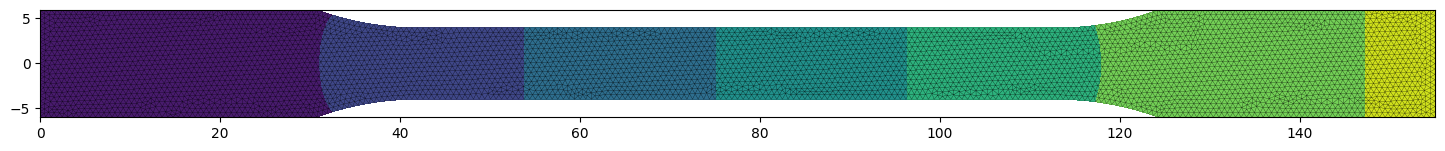

In [4]:
specimen.plot(u, axes=True, bcs=False, node_property=u[:,0], linewidth=0.1, figsize=(18,3))

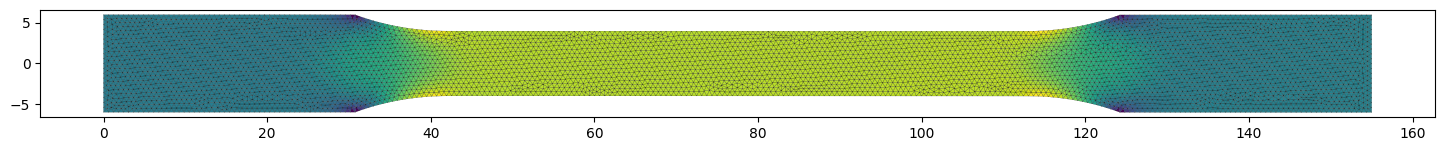

In [5]:
# Stress
sigma = specimen.compute_stress(u)
mises = torch.sqrt(sigma[:,0]**2 + sigma[:,1]**2 - sigma[:,0]*sigma[:,1])
specimen.plot(u, axes=True, bcs=False, element_property=mises, linewidth=0.1, figsize=(18,3))